In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import accuracy_score, f1_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split



In [47]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"
]

df = pd.read_csv(url, names=columns)



print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB
None
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.15841

In [48]:
#Q1-3
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"
]

df = pd.read_csv(url, names=columns)


print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB
None
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.15841

1. Define and describe a classification problem using the dataset.

This is a binary classification problem using the UCI Heart Disease dataset. We will train classifiers that can predict whether a patient has heart disease or not based on the input features. The features such as age, sex, blood pressure, cholesterol levels, chest pain type, and results from diagnostic tests. This dataset contains a target variable num with values ranging from 0 to 4, representing different heart disease degrees.(We might need transform the num variable into a binary outcome) target = 1 indicate presence of heart disease (original values 1 to 4) ， target = 0 means no heart disease.


2. Apply any chosen data transformations, or explain why no transformations were necessary.

We apply one-hot encoding to categorical variables with more than two classes. This allows classifiers to treat each category as a separate binary feature, which improves interpretability and model performance.

Standardization is necessary to numerical variables so that models like logistic regression are not biased by feature scale, which ensures that all features contribute equally to the model. It is very important for algorithms relying on distance metrics, such as k-nearest neighbors.


In [49]:
df = pd.read_csv(url, names=columns)
df.replace("?", np.nan, inplace=True)
df = df.apply(pd.to_numeric)
df.dropna(inplace=True)

df["target"] = df["num"].apply(lambda x: 1 if x > 0 else 0)
df.drop("num", axis=1, inplace=True)

categorical_cols = ["sex", "cp", "fbs", "restecg", "exang", "slope", "thal"]
numerical_cols = ["age", "trestbps", "chol", "thalach", "oldpeak", "ca"]

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

print("Transformed dataset shape:", df_encoded.shape)
print(df_encoded.head())


Transformed dataset shape: (297, 19)
        age  trestbps      chol   thalach   oldpeak        ca  target  \
0  0.936181  0.750380 -0.276443  0.017494  1.068965 -0.721976       0   
1  1.378929  1.596266  0.744555 -1.816334  0.381773  2.478425       1   
2  1.378929 -0.659431 -0.353500 -0.899420  1.326662  1.411625       1   
3 -1.941680 -0.095506  0.051047  1.633010  2.099753 -0.721976       0   
4 -1.498933 -0.095506 -0.835103  0.978071  0.295874 -0.721976       0   

   sex_1.0  cp_2.0  cp_3.0  cp_4.0  fbs_1.0  restecg_1.0  restecg_2.0  \
0     True   False   False   False     True        False         True   
1     True   False   False    True    False        False         True   
2     True   False   False    True    False        False         True   
3     True   False    True   False    False        False        False   
4    False    True   False   False    False        False         True   

   exang_1.0  slope_2.0  slope_3.0  thal_6.0  thal_7.0  
0      False      False     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB
None
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0

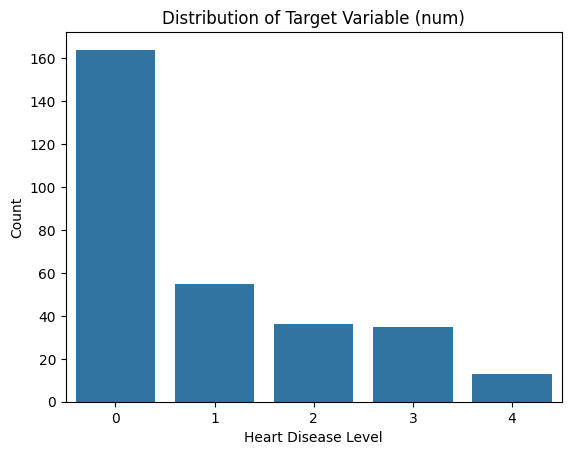

In [50]:
#3 
df_raw = pd.read_csv(url, names=columns)
print(df_raw.info())
print(df_raw.head())
print(df_raw['num'].value_counts())


sns.countplot(x="num", data=df_raw)
plt.title("Distribution of Target Variable (num)")
plt.xlabel("Heart Disease Level")
plt.ylabel("Count")
plt.show()

The dataset contains 303 observations (patients) and 14 variables: 13 features and 1 response variable: num
These features are clinical data such as age, blood pressure, cholesterol levels, and various categorical test results.

Data type: numerical (float64): age, trestbps, chol, thalach, oldpeak 
    Categorical: sex, cp, fbs, restecg, exang, slope, thal,
     (num) is an integer representing the target variable, ranging from 0 to 4.

There are a mix of numerical and categorical variables in this dataset, with a few medical features encoded as integers (like chest pain type, ECG results) that need transformation before modeling. 
The ca and thal columns are stored as objects might due to missing values encoded as "?", which will need to be cleaned for missing values.

The distribution is imbalanced based on the plot, most patients labeled as 0, and fewer cases in higher severity levels.
The target variable num is ordinal and ranges from 0 to 4, which represent increasing severity of heart disease. It need to be converted into a binary variable for classification.

In [51]:
#4
df_raw["target"] = df_raw["num"].apply(lambda x: 1 if x > 0 else 0)
df_raw.drop("num", axis=1, inplace=True)

print(df_raw["target"].value_counts())

target
0    164
1    139
Name: count, dtype: int64


In [52]:
#5
df.corr()["target"].sort_values(ascending=False)

target      1.000000
thal        0.526640
ca          0.463189
oldpeak     0.424052
exang       0.421355
cp          0.408945
slope       0.333049
sex         0.278467
age         0.227075
restecg     0.166343
trestbps    0.153490
chol        0.080285
fbs         0.003167
thalach    -0.423817
Name: target, dtype: float64

the features thal (r = 0.53), ca (r = 0.46), oldpeak (r = 0.42), exang (r = 0.42), and cp (r = 0.41) showing a pretty strong positive relationships to target variable and should be retained for model training. and also thalach (r = −0.42) has a strong negative correlation, indicate that lower heart rate is associated with heart disease, which is a strong predictor.

In contrast, features like fbs (r ≈ 0.00) and chol (r = 0.08) shows very slight correlation to the target variable and may be considered for removal during feature selection, which are unable to contribute meaningfully to classification performance.

In [53]:
#6
df.replace("?", np.nan, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')
df_clean = df.dropna()

print("Number of rows after dropping missing values:", df_clean.shape[0])

Number of rows after dropping missing values: 297


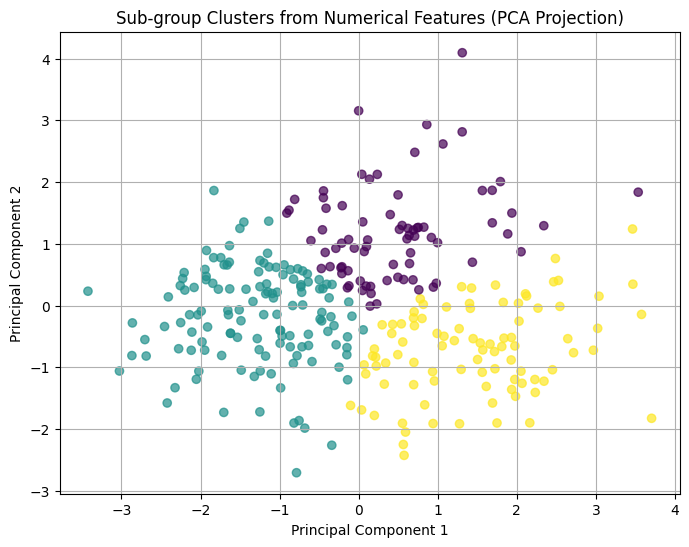

In [54]:
#7
df = df.replace("?", np.nan)
df = df.apply(pd.to_numeric, errors='coerce')
df_clean = df.dropna()

numerical_features = ["age", "trestbps", "chol", "thalach", "oldpeak", "ca"]
X_numerical = df_clean[numerical_features]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numerical)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=3, random_state=1)
clusters = kmeans.fit_predict(X_pca)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.title("Sub-group Clusters from Numerical Features (PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


In [55]:
#8
X = df_encoded.drop("target", axis=1)
y = df_encoded["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1
)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 207
Testing set size: 90


#9

We selected Logistic Regression and Random Forest as the two classifiers for this dataset.

Logistic Regression is appropriate because the target variable in the Heart Disease dataset is binary — indicating the presence or absence of heart disease. Logistic Regression is not only well-suited for binary classification, but it also provides interpretable results. The model’s coefficients indicate the direction and strength of the relationship between each feature and the outcome, which is especially valuable in a medical context where understanding the contribution of individual risk factors is critical.

Random Forest Classifier is chosen as a complementary model due to its ability to capture complex, non-linear relationships between features. It is an ensemble method that combines multiple decision trees to improve prediction accuracy and reduce overfitting. Random Forest handles both numerical and categorical features effectively and performs well even with smaller datasets. While it is less interpretable than Logistic Regression, it often achieves higher predictive performance, making it a strong candidate for comparison.

By using both models, we can balance interpretability and performance, aligning with the assignment’s requirement to apply and justify suitable classifiers.

In [56]:
logreg = LogisticRegression(max_iter=1000, random_state=1)
rf = RandomForestClassifier(n_estimators=100, random_state=1)

logreg.fit(X_train, y_train)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=1)

10 
We should select Accuracy and F1-Score as evaluation metrics.

Accuracy measures the overall proportion of correct predictions out of all predictions made. It can be calculated as: (True Positives + True Negatives) / Total Predictions
F1-Score is the harmonic mean of precision and recall, useful for handling imbalanced data. It can be calculated as: F1 = 2 × (Precision × Recall) / (Precision + Recall)

In [57]:
#11
logreg_params = {
    "C": [0.01, 0.1, 1, 10],
    "penalty": ["l2"],
    "solver": ["lbfgs"]
}

rf_params = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5]
}

logreg = LogisticRegression(max_iter=1000, random_state=1)
rf = RandomForestClassifier(random_state=1)

grid_logreg = GridSearchCV(logreg, logreg_params, cv=5, scoring="f1", n_jobs=-1)
grid_logreg.fit(X_train, y_train)

grid_rf = GridSearchCV(rf, rf_params, cv=5, scoring="f1", n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("Best Logistic Regression Parameters:", grid_logreg.best_params_)
print("Best Random Forest Parameters:", grid_rf.best_params_)

best_logreg = grid_logreg.best_estimator_
best_rf = grid_rf.best_estimator_

Best Logistic Regression Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Random Forest Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


In [58]:
#12
pca_logreg_pipe = Pipeline([
    ("pca", PCA()),
    ("logreg", LogisticRegression(max_iter=1000, random_state=1))
])

pca_logreg_params = {
    "pca__n_components": [5, 10, 15],  
    "logreg__C": [0.01, 0.1, 1, 10]   
}

grid_pca_logreg = GridSearchCV(
    pca_logreg_pipe,
    pca_logreg_params,
    cv=5,
    scoring="f1",
    n_jobs=-1
)

grid_pca_logreg.fit(X_train, y_train)


print("Best PCA + Logistic Regression Parameters:", grid_pca_logreg.best_params_)

best_pca_logreg = grid_pca_logreg.best_estimator_

Best PCA + Logistic Regression Parameters: {'logreg__C': 10, 'pca__n_components': 15}


We applied Principal Component Analysis (PCA) to perform feature extraction prior to Logistic Regression. PCA reduces the original feature space into a smaller set of uncorrelated components, which can help us to reduce dimensionality and noise.

In [59]:
#13
y_pred_logreg = best_logreg.predict(X_test)
y_pred_rf = best_rf.predict(X_test)
y_pred_pca = best_pca_logreg.predict(X_test)

def evaluate_model(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"{name}: Accuracy = {acc:.3f}, F1 Score = {f1:.3f}")

evaluate_model("Logistic Regression", y_test, y_pred_logreg)
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("PCA + Logistic Regression", y_test, y_pred_pca)


Logistic Regression: Accuracy = 0.811, F1 Score = 0.795
Random Forest: Accuracy = 0.833, F1 Score = 0.815
PCA + Logistic Regression: Accuracy = 0.800, F1 Score = 0.780


Random Forest got the best performance compared the other (Accuracy = 0.833, F1 = 0.815), showing its strength in capturing non-linear patterns. Logistic Regression also performed well (Accuracy = 0.811, F1 = 0.795) and remains valuable due to its interpretability. The PCA-based Logistic Regression model showed slightly lower performance (Accuracy = 0.800, F1 = 0.780), this is because some data loss during dimension reduction.

All of the models performance on accuracy and F1 scores are consistent, which indicate the data is balanced, and both metrics are good for comparison in these models.

Applying PCA for logistic regression shows us a slight drop in both accuracy and F1-score. While PCA helps us to reduce dimension and can improve training speed and stability, it will also discard some predictive data at the same time, which can affect performance. This shows a tradeoff between model simplicity and prediction accuracy when we using feature extraction.

In [60]:
#14
feature_names = X_train.columns

coefs = best_logreg.coef_[0]

coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefs
})

coef_df["AbsCoefficient"] = coef_df["Coefficient"].abs()
coef_df_sorted = coef_df.sort_values(by="AbsCoefficient", ascending=False)

coef_df_sorted.head(10)

,Feature,Coefficient,AbsCoefficient
6,sex_1.0,1.513777,1.513777
17,thal_7.0,1.158413,1.158413
9,cp_4.0,1.120503,1.120503
5,ca,1.062667,1.062667
10,fbs_1.0,-1.046676,1.046676
16,thal_6.0,-0.817452,0.817452
4,oldpeak,0.654627,0.654627
14,slope_2.0,0.576549,0.576549
3,thalach,-0.568134,0.568134
13,exang_1.0,0.549836,0.549836


Sex (sex_1.0) had the highest positive coefficient, indicating that male has more likelihood to have heart disease, which is consistent with medical research that heart disease tends to be more prevalent in men.
thalassemia indicator (thal_7.0) also had a strong positive coefficient, suggesting that certain abnormal thalassemia scan results are strongly associated with having heart disease.

thalach (maximum heart rate achieved) had a negative coefficient, indicating that higher heart rate is related with a lower risk of heart disease.

In [61]:
#15
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

kmeans = KMeans(n_clusters=3, random_state=1)
train_clusters = kmeans.fit_predict(X_train_pca)
test_clusters = kmeans.predict(X_test_pca)

X_train_clustered = X_train.copy()
X_test_clustered = X_test.copy()
X_train_clustered["cluster"] = train_clusters
X_test_clustered["cluster"] = test_clusters


clf4 = LogisticRegression(max_iter=1000, random_state=1)
clf4.fit(X_train_clustered, y_train)

y_pred_4 = clf4.predict(X_test_clustered)

acc_4 = accuracy_score(y_test, y_pred_4)
f1_4 = f1_score(y_test, y_pred_4)

print(f"4th Classifier (with clusters): Accuracy = {acc_4:.3f}, F1 Score = {f1_4:.3f}")

4th Classifier (with clusters): Accuracy = 0.789, F1 Score = 0.776


The accuracy of the fourth classifier was 0.789, and the F1 score was 0.776. Compared to the original Logistic Regression model (accuracy = 0.811, F1 = 0.795), this model performed slightly worse.
We introduced cluster labels as an additional feature in new logistic regression model but did not align with the heart disease labels and may have introduced noise rather than useful signal.
This shows us that sub-group structure must be relevant to the classification objective.

16

Question 1-5: Jiaxin(Zayn) Hu

Question 6-10: Felix He

Question 11-17: Rongxin Bi

17

GitHub repository link

https://github.com/zaynhu/Assignment_6_3DA/commits/main